In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import scipy
import joblib
import os

In [ ]:
dx=pd.read_csv('/content/real_legitimate_v1.csv')

In [ ]:
dy=pd.read_csv('/content/real_malware_v1.csv')

In [ ]:
df = pd.concat([dx, dy], ignore_index=True)
df.to_csv('combined.csv', index=False)

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df=df.to_csv('shuffled_dataset.csv', index=False)

In [ ]:
dr=pd.read_csv('/content/shuffled_dataset.csv')

In [ ]:
data={
    'Package':dr['Package'][:5000],
    'Malware':dr['Malware'][:5000],
    'prctl':dr['prctl'][:5000],
    'sha256':dr['sha256'][:5000],
    'EarliestModDate':dr['EarliestModDate'][:5000],
    'Malware':dr['Malware'][:5000],
    'write': dr['write'][:5000],
    'read':dr['read'][:5000],
    'write':dr['write'][:5000],
    'munmap':dr['munmap'][:5000],
    'mprotect':dr['mprotect'][:5000],
    'madvise':dr['madvise'][:5000],
    'ioctl':dr['ioctl'][:5000],
    'writev':dr['writev'][:5000],
    'dup':dr['dup'][:5000],
    'lseek':dr['lseek'][:5000],
    'mmap2':dr['mmap2'][:5000],
    'fstat64':dr['fstat64'][:5000],
    'rt_sigprocmask':dr['rt_sigprocmask'][:5000],
   'recvfrom':dr['recvfrom'][:5000],
    'getsockopt':dr['getsockopt'][:5000],
    'lseek':dr['lseek'][:5000],
    'clock_gettime':dr['clock_gettime'][:5000],
    'futex':dr['futex'][:5000],
    'pread':dr['pread'][:5000],
     'FilesInsideAPK':dr['FilesInsideAPK'][:5000],
   'TimesSubmitted':dr['TimesSubmitted'][:5000],
    'getsockopt':dr['getsockopt'][:5000],
    'Activities':dr['Activities'][:5000],
    'clock_gettime':dr['clock_gettime'][:5000],
    'NrIntActivities':dr['NrIntActivities'][:5000],
    'NrIntActivitiesActions':dr['NrIntActivitiesActions'][:5000],
    'TotalIntentFilters':dr['TotalIntentFilters'][:5000],
    'Scanners':dr['Scanners'][:5000],
    'MalFamily':dr['MalFamily'][:5000]
    }
dg=pd.DataFrame(data)
dg

,Package,Malware,prctl,sha256,EarliestModDate,write,read,munmap,mprotect,madvise,...,futex,pread,FilesInsideAPK,TimesSubmitted,Activities,NrIntActivities,NrIntActivitiesActions,TotalIntentFilters,Scanners,MalFamily
0,com.genwi.cmtandfvm\n,0,6,7422365d0c933d75a442d81d2f690db71569e415c0af6b...,12/8/2010,3,2,7,3,5,...,10.0,8.0,104.0,3.0,8,2,2,2,66.0,NaN
1,com.contimita\n,0,27,f0ed0160aff46a169502baecd3e9a3a087586d8ec0fb56...,2/17/2010,1,9,9,16,14,...,16.0,12.0,57.0,3.0,2,1,1,1,64.0,NaN
2,net.skyxu.sxrsxrsxr\n,1,98,ece2c2a17be0747439cf892be95a906874d2b5c6e63775...,10/11/2013,73,21,86,521,64,...,71.0,35.0,113.0,4.0,5,1,1,4,61.0,Malap
3,ch.nth.android.contentabo_l01_sim_univ\n,1,6,bbf0810117abb2b5c19e4e455ca71283711a82a3b3999b...,4/16/2020,17,3,0,4,4,...,30.0,0.0,928.0,2.0,8,3,3,7,63.0,SMSreg
4,com.mcd.oiyvzf\n,1,466,f8c552310b6e2a5d19caae927a0be1c9fbb5671b25804d...,2/27/2018,604,691,188,1735,254,...,874.0,679.0,103.0,2.0,9,2,3,12,65.0,SMSreg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,com.S30q8nvm.VG6e4OnA.g_74\n,1,257,1b90127cb7fd96b8d7ef83477fc5270cf325885170aa87...,10/11/2013,456,169,95,803,105,...,606.0,137.0,37.0,8.0,5,1,1,2,64.0,Airpush/StopSMS
3715,com.sivart.wordcrank\n,0,55,490673febfa2186d8a4c5a90dc287bba0f91482e57cd47...,5/19/2011,25,17,73,195,51,...,85.0,111.0,87.0,7.0,9,1,1,2,64.0,NaN
3716,com.androidJoneyZPocketDrum106\n,0,28,14c21364bf4b2f72992e47c489c07065af6406afc36313...,5/21/2011,3,3,54,14,21,...,1482.0,90.0,45.0,5.0,2,1,1,1,63.0,NaN
3717,org.baole.app.translatezh\n,0,48,ff888909586e6d2b51ba69bae6b8c904333d5de0be9e3f...,11/30/2010,7,3,66,188,39,...,24.0,51.0,32.0,5.0,4,1,1,2,66.0,NaN


In [ ]:
dg.isnull().sum()

Package                      0
Malware                      0
prctl                        0
sha256                       2
EarliestModDate              2
write                        0
read                         0
munmap                       0
mprotect                     0
madvise                      0
ioctl                        0
writev                       0
dup                          0
lseek                        0
mmap2                        0
fstat64                      0
rt_sigprocmask               0
recvfrom                     1
getsockopt                   1
clock_gettime                1
futex                        1
pread                        1
FilesInsideAPK               2
TimesSubmitted               2
Activities                   2
NrIntActivities              2
NrIntActivitiesActions       2
TotalIntentFilters           2
Scanners                     2
MalFamily                 1738
dtype: int64

In [ ]:
dg=dg.fillna(0)

In [ ]:
dg.isnull().sum()

Package                   0
Malware                   0
prctl                     0
sha256                    0
EarliestModDate           0
write                     0
read                      0
munmap                    0
mprotect                  0
madvise                   0
ioctl                     0
writev                    0
dup                       0
lseek                     0
mmap2                     0
fstat64                   0
rt_sigprocmask            0
recvfrom                  0
getsockopt                0
clock_gettime             0
futex                     0
pread                     0
FilesInsideAPK            0
TimesSubmitted            0
Activities                0
NrIntActivities           0
NrIntActivitiesActions    0
TotalIntentFilters        0
Scanners                  0
MalFamily                 0
dtype: int64

In [ ]:
dg.dtypes

Package                    object
Malware                     int64
prctl                       int64
sha256                     object
EarliestModDate            object
write                       int64
read                        int64
munmap                      int64
mprotect                    int64
madvise                     int64
ioctl                       int64
writev                      int64
dup                         int64
lseek                       int64
mmap2                       int64
fstat64                     int64
rt_sigprocmask              int64
recvfrom                  float64
getsockopt                float64
clock_gettime             float64
futex                     float64
pread                     float64
FilesInsideAPK            float64
TimesSubmitted            float64
Activities                 object
NrIntActivities            object
NrIntActivitiesActions     object
TotalIntentFilters         object
Scanners                  float64
MalFamily     

In [ ]:
dg.dtypes

Package                    object
Malware                     int64
prctl                       int64
sha256                     object
EarliestModDate            object
write                       int64
read                        int64
munmap                      int64
mprotect                    int64
madvise                     int64
ioctl                       int64
writev                      int64
dup                         int64
lseek                       int64
mmap2                       int64
fstat64                     int64
rt_sigprocmask              int64
recvfrom                  float64
getsockopt                float64
clock_gettime             float64
futex                     float64
pread                     float64
FilesInsideAPK            float64
TimesSubmitted            float64
Activities                 object
NrIntActivities            object
NrIntActivitiesActions     object
TotalIntentFilters         object
Scanners                  float64
MalFamily     

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(dg['MalFamily'].astype(str))
encoded_values = encoded_values.reshape(-1, 1)
dg['MalFamily'] = encoded_values
dg['MalFamily'].max()
encoded=label_encoder.fit_transform(dg['Package'].astype(str))
dg['Package']=encoded

In [ ]:
dg.isnull().sum()

Package                   0
Malware                   0
prctl                     0
sha256                    0
EarliestModDate           0
write                     0
read                      0
munmap                    0
mprotect                  0
madvise                   0
ioctl                     0
writev                    0
dup                       0
lseek                     0
mmap2                     0
fstat64                   0
rt_sigprocmask            0
recvfrom                  0
getsockopt                0
clock_gettime             0
futex                     0
pread                     0
FilesInsideAPK            0
TimesSubmitted            0
Activities                0
NrIntActivities           0
NrIntActivitiesActions    0
TotalIntentFilters        0
Scanners                  0
MalFamily                 0
dtype: int64

In [ ]:
dg=dg.fillna(0)

In [ ]:
import pandas as pd

In [ ]:
if pd.isnull(dg['EarliestModDate']).any():
    # Handle or fill the missing values if necessary
    dg['EarliestModDate'].fillna('fill_value', inplace=True)  # Replace 'fill_value' with an appropriate value
# Convert the 'EarliestModDate' column to datetime
dg['EarliestModDate'] = pd.to_datetime(dg['EarliestModDate'], errors='coerce')

In [ ]:
print(dg['EarliestModDate'].dtype)

datetime64[ns]


In [ ]:
dg.isnull().sum()

Package                    0
Malware                    0
prctl                      0
sha256                     0
EarliestModDate           67
write                      0
read                       0
munmap                     0
mprotect                   0
madvise                    0
ioctl                      0
writev                     0
dup                        0
lseek                      0
mmap2                      0
fstat64                    0
rt_sigprocmask             0
recvfrom                   0
getsockopt                 0
clock_gettime              0
futex                      0
pread                      0
FilesInsideAPK             0
TimesSubmitted             0
Activities                 0
NrIntActivities            0
NrIntActivitiesActions     0
TotalIntentFilters         0
Scanners                   0
MalFamily                  0
dtype: int64

In [ ]:
dg=dg.fillna(0)

In [ ]:
dg.isnull().sum()

Package                   0
Malware                   0
prctl                     0
sha256                    0
EarliestModDate           0
write                     0
read                      0
munmap                    0
mprotect                  0
madvise                   0
ioctl                     0
writev                    0
dup                       0
lseek                     0
mmap2                     0
fstat64                   0
rt_sigprocmask            0
recvfrom                  0
getsockopt                0
clock_gettime             0
futex                     0
pread                     0
FilesInsideAPK            0
TimesSubmitted            0
Activities                0
NrIntActivities           0
NrIntActivitiesActions    0
TotalIntentFilters        0
Scanners                  0
MalFamily                 0
dtype: int64

In [ ]:
# %% [code]
#!/usr/bin/env python
# coding: utf-8
# # Experiment 3: Train in batches by month and test in the next month
import pandas as pd
import numpy as np
# initial year defines the training (< initial_year) and testing sets (>= initial_year)
initial_year = "2017-12-30"
# Transform submission_date in a datetime column:
dg['EarliestModDate'] =  pd.to_datetime(dg['EarliestModDate'],errors='coerce')
# In[7]:
# Group data by months and create subsets to train and test:
dataTrain =dg[dg['EarliestModDate'] <=initial_year]
dataTest = dg[dg['EarliestModDate'] >initial_year]
print("Train shape:", dataTrain.shape)
print("Test shape:", dataTest.shape)
# In[9]:

# In[11]:




# In[9]:


# Feature extraction method:
# Feature extraction method:
def feature_extraction(X_dataTrain, X_dataTest):
    from sklearn.feature_extraction.text import TfidfVectorizer
    # initialize X_train and X_test
    X_train = []
    X_test = []
    # save models used
    models = []
    # iterate over each column of X_dataTrain
    for i in range(X_dataTrain.shape[1]):
        # train feature word2vec using column i
        #print("Training column {}...".format(i))
        # get train and test data
        train_data = np.asarray(X_dataTrain[:, i], dtype=str)  # Convert to numpy array
        test_data = np.asarray(X_dataTest[:, i], dtype=str)  # Convert to numpy array
        # initialize and train model
        tfidf = TfidfVectorizer(max_features=100)
        tfidf.fit(train_data)
        # transform train and test texts to w2v mean
        train_tfidf = tfidf.transform(train_data).todense()
        test_tfidf = tfidf.transform(test_data).todense()
        # if first execution, save only features
        if len(X_train) == 0:
            X_train = train_tfidf
            X_test = test_tfidf
        # concatenate existing features
        else:
            X_train = np.concatenate((X_train, train_tfidf), axis=1)
            X_test = np.concatenate((X_test, test_tfidf), axis=1)
        # save model
        models.append(tfidf)
    return X_train, X_test

# In[11]:


# Normalization method:
def normalization(X_train, X_test):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(np.asarray(X_train))
    XX_train = scaler.transform(np.asarray(X_train))
    XX_test = scaler.transform(np.asarray(X_test))
    return XX_train, XX_test



# In[13]:


# Iterate over months in test data:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#from sklearn.ensemble import RandomForestClassifier as Classifier
from sklearn.linear_model import SGDClassifier as Classifier
# group by year-month
dataTestTime = dataTest.groupby([dataTest.EarliestModDate.dt.year, dataTest.EarliestModDate.dt.month])
# get data train labels
y_train = np.array(dataTrain["Malware"])
# remove unused columns from dataTrain
UNUSED_COLUMNS = ["Malware", "sha256", "EarliestModDate"]
for c in UNUSED_COLUMNS:
    del dataTrain[c]
# get dataTrain values
X_dataTrain = dataTrain.values
# arrays to save information
accs = [] # accuracy
f1s = [] # f1score
recall = [] # recall
precision = [] # precision
years = []
months = []
# iterate over year and month
for (year, month), dataTestMonth in dataTestTime:
    # get data test labels
    y_test = np.array(dataTestMonth["Malware"])
    # remove unused columns from data test
    for c in UNUSED_COLUMNS:
        del dataTestMonth[c]
    # get dataTestMonth values
    X_dataTest = dataTestMonth.values
    # feature extraction
    X_train, X_test = feature_extraction(X_dataTrain, X_dataTest)
    # normalization
    XX_train, XX_test = normalization(X_train, X_test)
    # classifier
    # clf = RandomForestClassifier(random_state=0)
    clf = Classifier(random_state=0)
    # train classifier
    clf.fit(XX_train,y_train)
    # predict test data
    y_pred = clf.predict(XX_test)
    # update train data and labels with actual month
    X_dataTrain = np.append(X_dataTrain, X_dataTest, axis=0)
    y_train = np.concatenate((y_train, np.array(y_test)), axis=0)
    print("{}-{}".format(year,month))
    # save metrics
    f1 = f1_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    re = recall_score(y_test, y_pred)
    pr = precision_score(y_test, y_pred)
    if (f1 !=0) and (re != 0) and (pr != 0):
        accs.append(acc)
        f1s.append(f1)
        recall.append(re)
        precision.append(pr)
        years.append(year)
        months.append(month)
        print(acc)




Train shape: (3520, 30)
Test shape: (132, 30)
2018-1
0.7272727272727273
2018-2
0.75
2018-3
0.72
2018-4
0.5
2018-5
0.7333333333333333
2018-6
0.9230769230769231
2018-7
1.0
2018-8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2018-9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2018-10
1.0
2018-11


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2019-2
1.0
2019-5
0.5
2019-8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2019-9


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2019-10
1.0
2019-11
0.8
2019-12


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2020-3
1.0
2020-4
1.0
2020-5
1.0
2020-6
1.0
2020-11
1.0


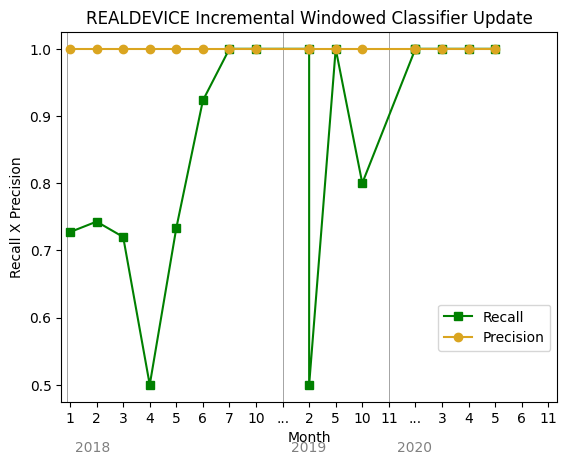

In [ ]:
import matplotlib.pyplot as plt
# interval of months to plot
months_interval = 1
# months to plot
plt_months = []
# plot years bars
last_year = years[0]
plt.axvline(-0.1,color="gray",linewidth=0.5)
plt.text(0.2,0.4,last_year, color="gray")
x_ind = 0
n_changes = 0
x_inds = []
for i, y in enumerate(years):
    if y!=last_year:
        plt.axvline(i,color="gray",linewidth=0.5)
        plt.text(i+0.3,0.4,y, color="gray")
        last_year = y
        plt_months.append("...")
        plt_months.append(months[i])
        x_ind = x_ind + 1
        n_changes = n_changes + 1
        x_inds.append(x_ind)
    else:
        plt_months.append(months[i])
        x_inds.append(x_ind)
        x_ind = x_ind + 1
plt.plot(x_inds, recall, 's-', color="green", label="Recall")
plt.plot(x_inds, precision, 'o-', color="goldenrod", label="Precision")
# plot months
plt.xticks(range(0,len(plt_months),months_interval), (plt_months))

plt.xlabel("Month")
plt.ylabel("Recall X Precision")
plt.title("REALDEVICE Incremental Windowed Classifier Update")
plt.legend(loc="center right", bbox_to_anchor=(1, 0.2))
plt.xlim(-0.33,len(plt_months)-0.66)
plt.show()

In [ ]:
accs

[0.7272727272727273,
 0.75,
 0.72,
 0.5,
 0.7333333333333333,
 0.9230769230769231,
 1.0,
 1.0,
 1.0,
 0.5,
 1.0,
 0.8,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
print("Avg Accuracy:", np.mean(accs))
print("Avg F1Score:", np.mean(f1s))
print("Avg Recall:", np.mean(recall))
print("Avg Precision:", np.mean(precision))

Avg Accuracy: 0.861981351981352
Avg F1Score: 0.9153029206031169
Avg Recall: 0.8615611839141252
Avg Precision: 1.0


In [ ]:
print(y_pred)

[1 1 1 1]
